In [76]:
import numpy as np  # array operations
import pandas as pd  # time series management
from pylab import plt
plt.style.use('ggplot')
# put all plots in the notebook itself
%matplotlib inline

In [105]:
data = pd.read_csv('https://github.com/mansoor-msh/Mansoor-Sheikh/blob/master/PQ1.csv',
                   index_col=0, parse_dates=True)

ParserError: Error tokenizing data. C error: Expected 1 fields in line 49, saw 2


In [ ]:
type(data)

In [106]:
data.info()  # meta information

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1239 entries, 2015-01-01 to 2019-12-31
Data columns (total 6 columns):
CHCC    1239 non-null float64
KSE     1239 non-null float64
MCB     1239 non-null float64
OGDC    1239 non-null float64
NML     1239 non-null float64
MA50    1190 non-null float64
dtypes: float64(6)
memory usage: 107.8 KB


In [94]:
data.tail()  # final five rows

,CHCC,KSE,MCB,OGDC,NML
Date,,,,,
2019-12-24,53.65,40328.32,207.55,142.00,103.15
2019-12-26,55.02,41127.79,211.00,146.70,106.90
2019-12-27,53.38,40848.53,208.93,143.55,105.60
2019-12-30,53.50,40887.62,204.00,142.00,106.00
2019-12-31,53.00,40735.08,211.00,142.20,105.60


In [95]:
data['CHCC'].head()  # first five rows of single column

Date
2015-01-01    72.11
2015-01-02    75.71
2015-01-05    76.41
2015-01-06    77.69
2015-01-07    77.95
Name: CHCC, dtype: float64

In [96]:
data[['KSE', 'MCB']].tail()  # last five rows of 2 columns

,KSE,MCB
Date,,
2019-12-24,40328.32,207.55
2019-12-26,41127.79,211.00
2019-12-27,40848.53,208.93
2019-12-30,40887.62,204.00
2019-12-31,40735.08,211.00


In [97]:
data.loc['2017-10-06']  # single row via index value

CHCC      109.47
KSE     41312.59
MCB       206.27
OGDC      146.00
NML       146.13
Name: 2017-10-06 00:00:00, dtype: float64

In [98]:
data.iloc[:2]  # two rows via index numbers

,CHCC,KSE,MCB,OGDC,NML
Date,,,,,
2015-01-01,72.11,32503.80,308.98,206.44,124.30
2015-01-02,75.71,32731.61,311.90,208.56,128.88


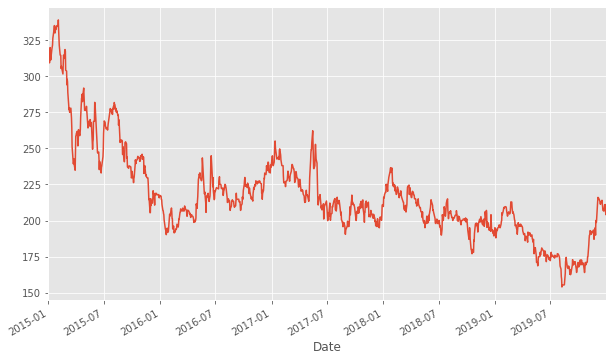

In [99]:
data['MCB'].plot(figsize=(10, 6));

In [100]:
# fully vectorized operation for log return calculation
rets = np.log(data['KSE'] / data['KSE'].shift(1))

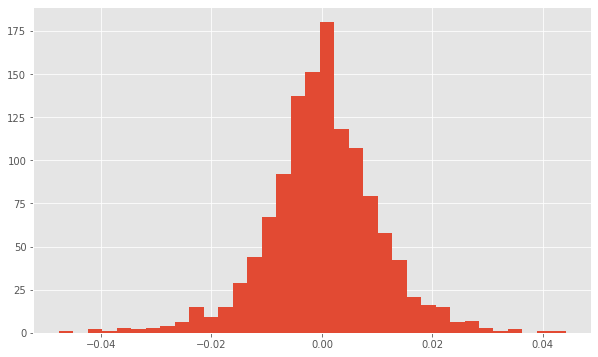

In [101]:
rets.hist(figsize=(10, 6), bins=35);

In [102]:
# fully vectorized calculation of 50 days moving average/trend
data['MA50'] = data['OGDC'].rolling(50).mean()

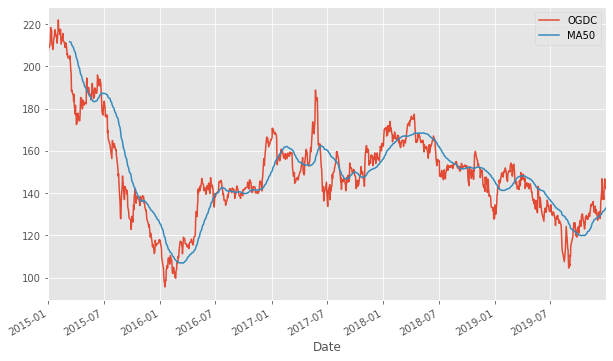

In [103]:
data[['OGDC', 'MA50']].plot(figsize=(10, 6));

In [104]:
data

,CHCC,KSE,MCB,OGDC,NML,MA50
Date,,,,,,
2015-01-01,72.11,32503.80,308.98,206.44,124.30,NaN
2015-01-02,75.71,32731.61,311.90,208.56,128.88,NaN
2015-01-05,76.41,32757.79,309.13,209.16,128.78,NaN
2015-01-06,77.69,32668.73,309.95,210.04,126.92,NaN
2015-01-07,77.95,32835.94,319.65,210.69,126.79,NaN
...,...,...,...,...,...,...
2019-12-24,53.65,40328.32,207.55,142.00,103.15,131.7144
2019-12-26,55.02,41127.79,211.00,146.70,106.90,132.0882
2019-12-27,53.38,40848.53,208.93,143.55,105.60,132.4238
